In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

In [3]:
np.random.seed(42)

n = 50

data = np.random.normal(loc = 5 ,scale = 1 , size = n)

mu_0 = 0
tau = 10

def log_posterior(mu):
    log_likelihood = np.sum(norm.logpdf(data, loc = 5, scale = 1))
    log_prior = norm.logpdf(mu,loc = mu_0, scale = tau)

    return log_likelihood + log_prior



In [4]:
# Metropolis-Hastings Algorithm

mu_current = 0
proposal_sd = 0.5
samples = []
accepted = 0

for i in range(10000):
    mu_proposed = np.random.normal(mu_current, proposal_sd)

    log_r = log_posterior(mu_proposed) - log_posterior(mu_current)

    if np.log(np.random.rand()) < log_r:
        mu_current = mu_proposed
        accepted += 1

    samples.append(mu_current)

samples = np.array(samples)


burn_in = 1000
samples = samples[burn_in:]


In [5]:
# Analytical PDF

y_bar = np.mean(data)

tau_n_sq = 1/((n/1**2)+(1/tau**2))
mu_n = tau_n_sq * (((n*y_bar)/1**2) + (mu_0 / tau**2))

tau_n = np.sqrt(tau_n_sq)

x = np.linspace(mu_n - 4*tau_n, mu_n + 4*tau_n,200)
posterior_pdf = norm.logpdf(x,loc = mu_n, scale = tau_n)

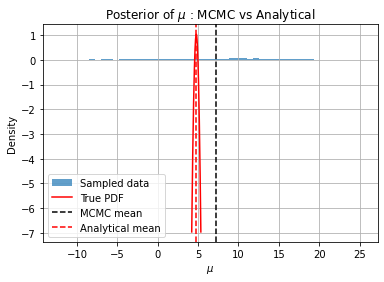

In [6]:
plt.hist(samples, bins = 50, density = True, alpha = 0.7, label = "Sampled data")
plt.plot(x,posterior_pdf, 'r-', label = "True PDF")
plt.axvline(np.mean(samples), color='k', linestyle='--', label='MCMC mean')
plt.axvline(mu_n, color='r', linestyle='--', label='Analytical mean')
plt.title("Posterior of $\mu$ : MCMC vs Analytical")
plt.xlabel("$\mu$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()